In [44]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from data_cleaning import df
from funciones import label

Cargando datos:

In [51]:
video_games = pd.DataFrame(df)

A continuación vamos a revisar la columna de años para poder hacer una revisión de los datos a través del tiempo

In [52]:
type(video_games['Year_of_Release'])

pandas.core.series.Series

In [56]:
video_games['Year_of_Release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2020.])

A continuación vamos a ver si podemos asumir que las ventas globales no son más que la suma de ventas segmentadas.

In [7]:
specific_sales = video_games['NA_Sales'] + video_games['EU_Sales'] + video_games['JP_Sales'] + video_games['Other_Sales']
Diference = video_games['Global_Sales'] - specific_sales
sum(Diference)

4.199999999999886

Una vez revisada esta parte, podemos asumir que salvo por la suma de centavos, las ventas globales no son más que la suma de las ventas alrededor del mundo

/home/mario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


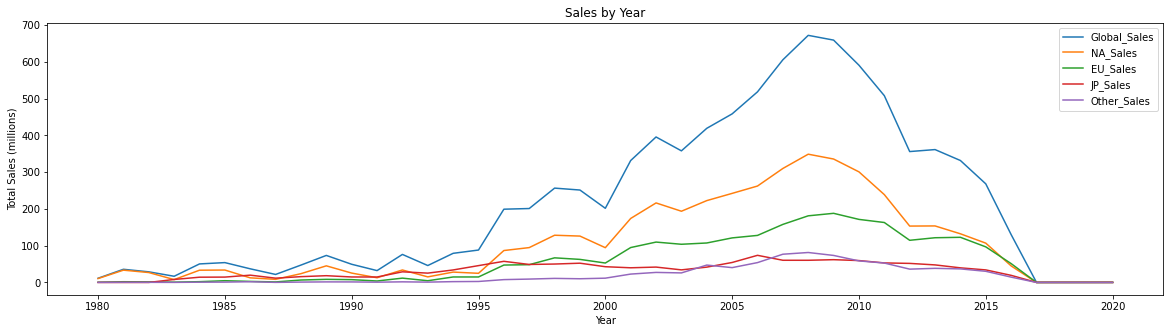

In [42]:
yearly_grouped = video_games.groupby(by="Year_of_Release")
all_sales_mean = (yearly_grouped['Global_Sales','NA_Sales','EU_Sales','JP_Sales',
                                 'Other_Sales']).sum().plot(figsize=(20,5))
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales (millions)')
plt.show()

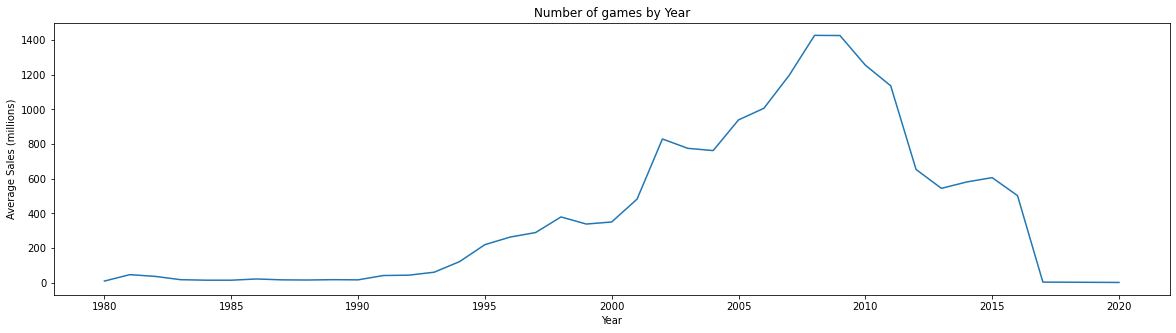

In [43]:
yearly_grouped = video_games.groupby(by="Year_of_Release")

games_x_year = yearly_grouped['Name'].count().plot(figsize=(20,5))
plt.title('Number of games by Year')
plt.xlabel('Year')
plt.ylabel('Average Sales (millions)')
plt.show()

Vemos que los años donde hubo mayor venta de videojuegos fue después del año 2000 y previamente al 2015. Aunque esto se debe a los datos que tenemos, donde a partir de 2016, la base ya no contempla nuevos lanzamientos.

Cuando el año específico o el volumen de venta respecto al tiempo sea relevante, consideraremos los datos unicamente hasta 2016.

Ahora revisaremos como se comportan las ventas de videojuegos por el género o tipo de video juego

Text(0, 0.5, 'Global Sales')

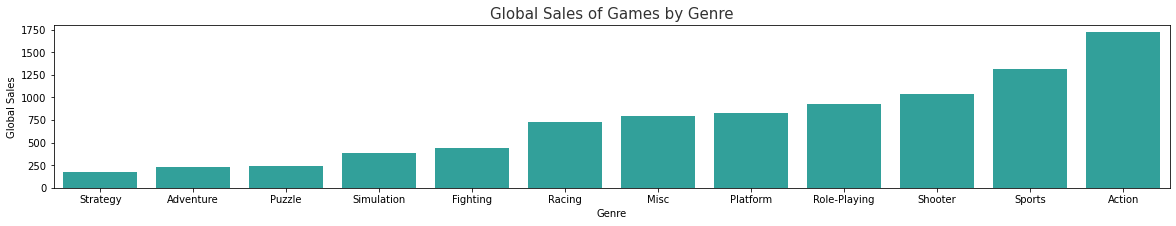

In [7]:
global_sales_by_genre = video_games.groupby('Genre').agg({'Global_Sales':np.sum}).sort_values('Global_Sales')
plt.subplots(figsize = (20,3))
ax = sns.barplot(x = global_sales_by_genre.index, y = global_sales_by_genre.Global_Sales, color = 'lightseagreen')
ax.set_title('Global Sales of Games by Genre', size=15, alpha=0.8)
ax.set_xlabel('Genre', size = 10)
ax.set_ylabel('Global Sales', size=10)

Ventas por plataforma

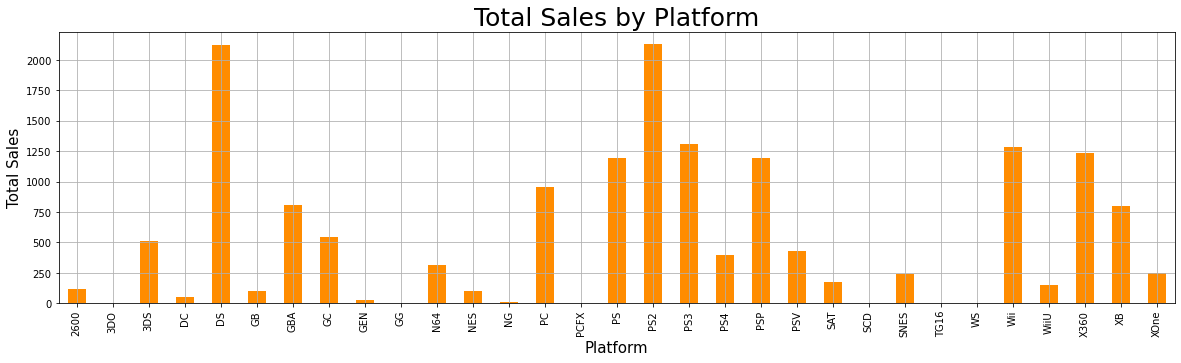

In [8]:
Platform_grouped = video_games.groupby(by = 'Platform')
total_sales = (Platform_grouped['Genre']).count().plot(kind = 'bar', grid=True, figsize=(20,5), color = 'darkorange')
plt.title('Total Sales by Platform', size = 25)
plt.xlabel('Platform', size = 15)
plt.ylabel('Total Sales',size = 15)
plt.show()

Se puede notar que las plataformas que más han vendido son PS2, DS y PS3.

Veamos las ventas por desarrollador de videojuegos. Se utiliza la variable 'Publisher' a favor de 'Developer' ya que la primera está más agregada, es decir, un 'Publisher' está conformado de uno o más Developers. Para fines de este análisis, la información que nos provee 'Publisher' es suficiente

Text(0, 0.5, 'Sales')

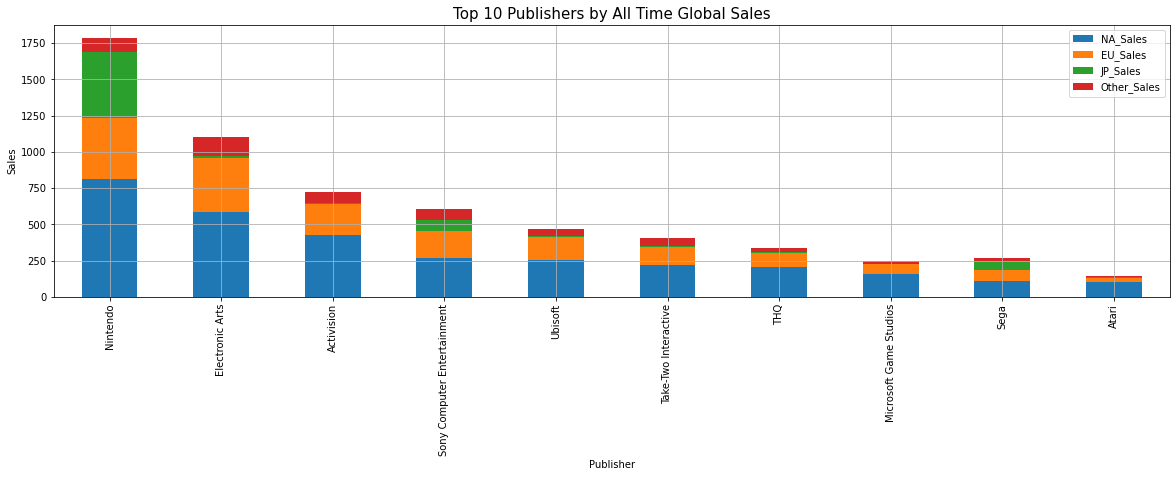

In [10]:
sales_publisher = video_games.pivot_table(index=['Publisher'], 
                                          values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], 
                                          aggfunc=np.sum).sort_values(['NA_Sales'], ascending=False)
sales_publisher = sales_publisher[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
ax = sales_publisher.iloc[0:10,:].plot(kind='bar', stacked=True, grid=True,figsize=(20,5))
ax.set_title('Top 10 Publishers by All Time Global Sales', size=15)
ax.set_xlabel('Publisher', size=10, color='black')
ax.set_ylabel('Sales', size=10, color='Black')

La gráfica anterior nos muestra el top 10 de empresas desarrolladoras segun sus ventas acumuladas a lo largo del tiempo.

Vamos a agrupar algunas plataformas con las comañías más conocidas.

In [11]:
platforms = {"Playstation": ["PS", "PS2", "PS3", "PS4"],
             "Xbox": ["XB", "X360", "XOne"],
             "PC": ["PC"],
             "Nintendo": ["Wii", "WiiU"],
             "Portable": ["GB", "GBA", "GC", "DS", "3DS", "PSP", "PSV"]}

video_games["Grouped_Platform"] = video_games["Platform"].apply(lambda x: label(x, groups=platforms))
video_games["Grouped_Platform"]

0           Nintendo
1        Other_label
2           Nintendo
3           Nintendo
4           Portable
            ...     
16714    Playstation
16715           Xbox
16716       Portable
16717       Portable
16718       Portable
Name: Grouped_Platform, Length: 16448, dtype: object

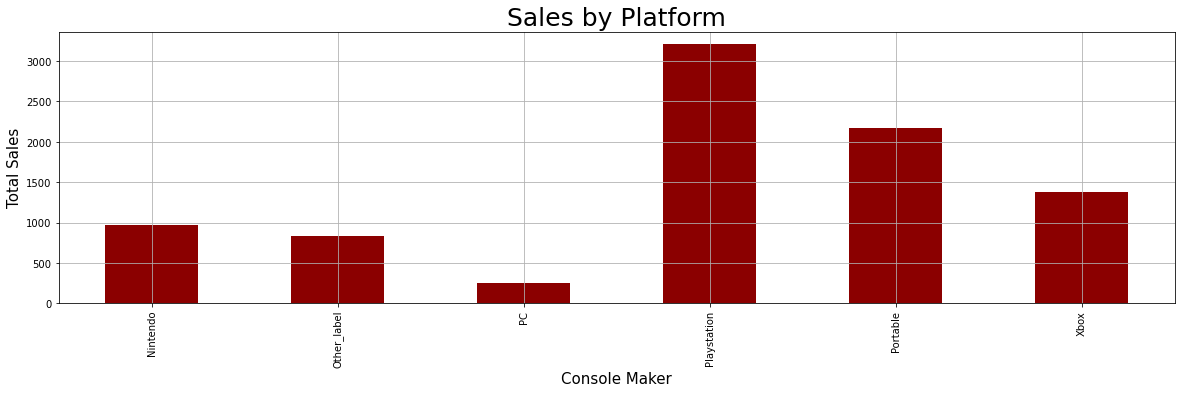

In [13]:
Platform_grouped = video_games.groupby(by = 'Grouped_Platform')
total_sales = (Platform_grouped['Global_Sales']).sum().plot(kind = 'bar', grid=True, figsize=(20,5), color = 'darkred')
plt.title('Sales by Platform', size = 25)
plt.xlabel('Console Maker', size = 15)
plt.ylabel('Total Sales',size = 15)
plt.show()

A continuación observaremos los ratings y los scores

In [14]:
video_games.groupby(video_games['Rating']).count()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Grouped_Platform
Rating,,,,,,,,,,,,,,,,
AO,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
E,3922,3922,3922,3922,3921,3922,3922,3922,3922,3922,2756,2756,2338,2338,3922,3922
E10+,1393,1393,1393,1393,1393,1393,1393,1393,1393,1393,1097,1097,1026,1026,1393,1393
EC,8,8,8,8,8,8,8,8,8,8,0,0,1,1,8,8
K-A,3,3,3,3,3,3,3,3,3,3,1,1,3,3,3,3
M,1536,1536,1536,1536,1536,1536,1536,1536,1536,1536,1457,1457,1492,1492,1536,1536
RP,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
T,2905,2905,2905,2905,2904,2905,2905,2905,2905,2905,2589,2589,2518,2518,2905,2905


In [15]:
video_games[video_games['Rating'].isin(['AO','EC','K-A','RP'])]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Grouped_Platform
656,Theme Hospital,PC,1997.0,Strategy,Electronic Arts,2.30,0.10,0.00,0.00,2.40,NaN,NaN,90.0,90.0,Bullfrog Productions,K-A,PC
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,Take-Two Interactive,1.26,0.61,0.00,0.09,1.95,93.0,58.0,86.0,118.0,Rockstar North,AO,Xbox
903,PaRappa The Rapper,PS,1996.0,Misc,Sony Computer Entertainment,0.26,0.16,1.46,0.03,1.92,92.0,15.0,74.0,48.0,NanaOn-Sha,K-A,Playstation
4297,Nickelodeon Team Umizoomi,DS,2011.0,Action,Take-Two Interactive,0.42,0.00,0.00,0.03,0.45,NaN,NaN,NaN,NaN,Black Lantern Studios,EC,Portable
5034,Sesame Street: Elmo's A-to-Zoo Adventure,Wii,2010.0,Misc,Warner Bros. Interactive Entertainment,0.35,0.00,0.00,0.02,0.38,NaN,NaN,NaN,NaN,Black Lantern Studios,EC,Nintendo
6047,Sesame Street: Cookie's Counting Carnival,Wii,2010.0,Misc,Warner Bros. Interactive Entertainment,0.27,0.00,0.00,0.02,0.29,NaN,NaN,NaN,NaN,Black Lantern Studios,EC,Nintendo
6765,Dora the Explorer: Journey to the Purple Planet,PS2,2005.0,Adventure,Global Star,0.12,0.09,0.00,0.03,0.24,NaN,NaN,70.0,4.0,Take-Two Interactive,EC,Playstation
7587,"Ni Hao, Kai-lan: New Year's Celebration",DS,2009.0,Misc,Take-Two Interactive,0.19,0.00,0.00,0.01,0.20,NaN,NaN,NaN,NaN,Take-Two Interactive,EC,Portable
9961,Dora the Explorer: Journey to the Purple Planet,GC,2005.0,Adventure,Global Star,0.09,0.02,0.00,0.00,0.12,NaN,NaN,NaN,NaN,Take-Two Interactive,EC,Portable
13066,Sesame Street: Cookie's Counting Carnival,PC,2010.0,Misc,Warner Bros. Interactive Entertainment,0.05,0.00,0.00,0.00,0.05,NaN,NaN,NaN,NaN,Black Lantern Studios,EC,PC


In [16]:
video_games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
rating_group = video_games[['NA_Sales','EU_Sales','JP_Sales','Global_Sales','Other_Sales']].groupby(video_games['Rating']).sum()
rating_group

,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Other_Sales
Rating,,,,,
AO,1.26,0.61,0.00,1.95,0.09
E,1274.51,703.87,197.96,2408.96,231.56
E10+,345.50,183.35,40.20,641.20,71.93
EC,1.53,0.11,0.00,1.78,0.11
K-A,2.56,0.27,1.46,4.33,0.03
M,742.89,480.00,63.58,1462.60,176.06
RP,0.00,0.03,0.00,0.03,0.01
T,747.60,421.79,150.70,1474.13,152.99


Text(0, 0.5, 'Total Global Sales')

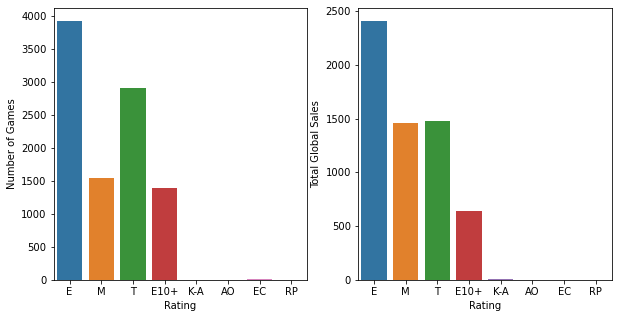

In [17]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.countplot(x="Rating", data=video_games, ax=ax1)
ax1.set_ylabel("Number of Games")
sns.barplot(x="Rating", y="Global_Sales",data=video_games, estimator=sum, ax=ax2, ci=None)
ax2.set_ylabel("Total Global Sales")

In [18]:
type(video_games['Critic_Score'])

pandas.core.series.Series

In [19]:
video_games.dropna(subset=["Name","Critic_Score"],inplace=True)
video_games['Critic_Score'].unique()
video_games.Critic_Score = video_games.Critic_Score.astype(np.int64)
type(video_games['Critic_Score'])

pandas.core.series.Series

In [20]:
video_games['Critic_Score']

0        76
2        82
3        80
6        89
7        58
         ..
16700    61
16701    53
16702    48
16706    60
16709    63
Name: Critic_Score, Length: 7983, dtype: int64

In [21]:
type(video_games['User_Score'])

pandas.core.series.Series

In [22]:
video_games['User_Score']

0        80.0
2        83.0
3        80.0
6        85.0
7        66.0
         ... 
16700    58.0
16701     NaN
16702     NaN
16706    72.0
16709    58.0
Name: User_Score, Length: 7983, dtype: float64

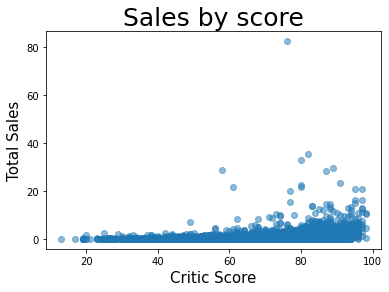

In [24]:
plt.scatter(video_games['Critic_Score'], video_games['Global_Sales'], alpha=0.5)
plt.title('Sales by score', size = 25)
plt.xlabel('Critic Score', size = 15)
plt.ylabel('Total Sales',size = 15)
plt.show()

Con la grafica anterior podemos ver que, en general, los videojuegos con mejor score de los críticos suelen tener mejores ventas, algo que es intuitivo pensar.

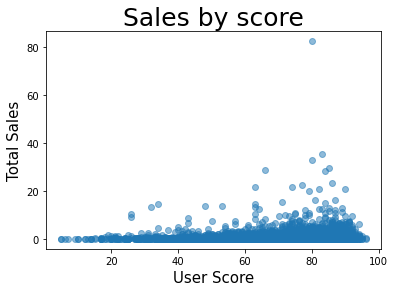

In [26]:
plt.scatter(video_games['User_Score'], video_games['Global_Sales'], alpha=0.5)
plt.title('Sales by score', size = 25)
plt.xlabel('User Score', size = 15)
plt.ylabel('Total Sales',size = 15)
plt.show()